<a href="https://colab.research.google.com/github/Samy-Annasri/ReverseForecasAttack/blob/main/ReverseForecasAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import sys
import os

def in_colab():
    return 'google.colab' in sys.modules

if in_colab():
    repo_name = "ReverseForecasAttack"
    ipynb_name = "genetic_algorithm_adv.ipynb"
    cwd = os.getcwd()
    basename = os.path.basename(cwd)

    if basename != repo_name:
        if not os.path.exists(repo_name):
            !git clone https://github.com/Samy-Annasri/ReverseForecasAttack.git
        %cd {repo_name}
        %rm {ipynb_name}



Cloning into 'ReverseForecasAttack'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 72 (delta 28), reused 39 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (72/72), 1.21 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/ReverseForecasAttack
rm: cannot remove 'genetic_algorithm_adv.ipynb': No such file or directory


In [3]:
import sys
'''
supre code for any module just for test so in #
if 'prepare_stock_dataset' in globals():
    del globals()['prepare_stock_dataset']

module_name = 'utils.setup_google_stock_dataset'
if module_name in sys.modules:
    del sys.modules[module_name]
'''


"\nsupre code for any module just for test so in #\nif 'prepare_stock_dataset' in globals():\n    del globals()['prepare_stock_dataset']\n\nmodule_name = 'utils.setup_google_stock_dataset'\nif module_name in sys.modules:\n    del sys.modules[module_name]\n"

## STEP 1: PREP DATA

In [4]:
google_data = pd.read_csv("data/HistoricalData_1747091015337.csv")
google_data['Date'] = pd.to_datetime(google_data['Date'])
google_data = google_data.sort_values(by='Date')
display(google_data)

,Date,Close/Last,Volume,Open,High,Low
1254,2020-05-13,$67.4665,36251700,$68.8525,$69.2741,$66.42
1253,2020-05-14,$67.8065,32061540,$66.751,$67.871,$66.1955
1252,2020-05-15,$68.6595,34154940,$67.50,$68.724,$66.95
1251,2020-05-18,$69.197,36479280,$68.0875,$69.6163,$67.7125
1250,2020-05-19,$68.6743,25612980,$69.3499,$69.60,$68.6743
...,...,...,...,...,...,...
4,2025-05-05,$166.05,15309340,$164.515,$167.10,$164.47
3,2025-05-06,$165.20,10691950,$163.96,$166.74,$163.13
2,2025-05-07,$152.80,78900430,$166.07,$166.99,$149.4901
1,2025-05-08,$155.75,38387510,$155.92,$157.41,$154.10


In [5]:
from utils.setup_google_stock_dataset import prepare_stock_dataset
sequence_length = 30
result = prepare_stock_dataset(google_data)

train_loader = result['train_loader']
test_loader = result['test_loader']
train_size = result['train_size']
min_max = result['min_max']
dates = result['dates']
price_min, price_max = min_max['Close/Last']


/content/ReverseForecasAttack/utils/setup_google_stock_dataset.py:65: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X = torch.tensor(X)  # (N, sequence_length, num_features)


## STEP 2: TRAIN NORMAL LSTM

In [6]:
from utils.train_model import train_model
from models.lstm import SimpleLSTM
model_google = SimpleLSTM(input_size=5, hidden_size=64, output_size=1, num_layers=2)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model_google.parameters(), lr=0.001)
num_epochs = 30
train_model(model_google, loss_fn, optimizer, num_epochs, train_loader)

Epoch [1/30], Train Loss: 0.0447
Epoch [2/30], Train Loss: 0.0077
Epoch [3/30], Train Loss: 0.0015
Epoch [4/30], Train Loss: 0.0011
Epoch [5/30], Train Loss: 0.0010
Epoch [6/30], Train Loss: 0.0011
Epoch [7/30], Train Loss: 0.0012
Epoch [8/30], Train Loss: 0.0010
Epoch [9/30], Train Loss: 0.0010
Epoch [10/30], Train Loss: 0.0009
Epoch [11/30], Train Loss: 0.0009
Epoch [12/30], Train Loss: 0.0009
Epoch [13/30], Train Loss: 0.0008
Epoch [14/30], Train Loss: 0.0008
Epoch [15/30], Train Loss: 0.0008
Epoch [16/30], Train Loss: 0.0009
Epoch [17/30], Train Loss: 0.0008
Epoch [18/30], Train Loss: 0.0008
Epoch [19/30], Train Loss: 0.0008
Epoch [20/30], Train Loss: 0.0009
Epoch [21/30], Train Loss: 0.0008
Epoch [22/30], Train Loss: 0.0007
Epoch [23/30], Train Loss: 0.0007
Epoch [24/30], Train Loss: 0.0008
Epoch [25/30], Train Loss: 0.0007
Epoch [26/30], Train Loss: 0.0007
Epoch [27/30], Train Loss: 0.0007
Epoch [28/30], Train Loss: 0.0007
Epoch [29/30], Train Loss: 0.0007
Epoch [30/30], Train Lo

In [7]:
from utils.google_eval import evaluate_model_google
results = evaluate_model_google(model_google, test_loader, dates, train_size)

real_values = results['real_values']
predicted_values = results['predicted_values']
test_dates = results['test_dates']

In [8]:
# Computes scalar similarity (cosine similarity) between true and predicted values.
# Higher values indicate that adversarial predictions remain directionally aligned
# with the true values, suggesting stealthy and rational attacks!
def scalar_similarity(y_true, y_pred):
    numerator = np.dot(y_true, y_pred)
    denominator = np.linalg.norm(y_true) * np.linalg.norm(y_pred)
    if denominator == 0:
        return 0.0
    return numerator / denominator

In [9]:
# Creation of the tab result for plotting adversial attack result
models = ['LSTM']
metrics = ['MAE', "RMSE", 'SIM']

row_index = pd.MultiIndex.from_product([models, metrics], names=['Model', 'Metric'])

attacks = ['NA','REV']
epsilons = {
    'NA': [0],
    'REV':[0,0.01,0.1,0.2],
}

col_tuples = []
for atk, eps_list in epsilons.items():
    for eps in eps_list:
        col_tuples.append((atk, f"{eps:.2f}"))

col_index = pd.MultiIndex.from_tuples(col_tuples, names=['Attack', 'ε'])

res_tab = pd.DataFrame(index=row_index, columns=col_index, dtype=float)

print(res_tab)

Attack         NA  REV               
ε            0.00 0.00 0.01 0.10 0.20
Model Metric                         
LSTM  MAE     NaN  NaN  NaN  NaN  NaN
      RMSE    NaN  NaN  NaN  NaN  NaN
      SIM     NaN  NaN  NaN  NaN  NaN


LSTM | NA – Epsilon 0.00 – MAE: 5.5974 | SIM: 0.9996


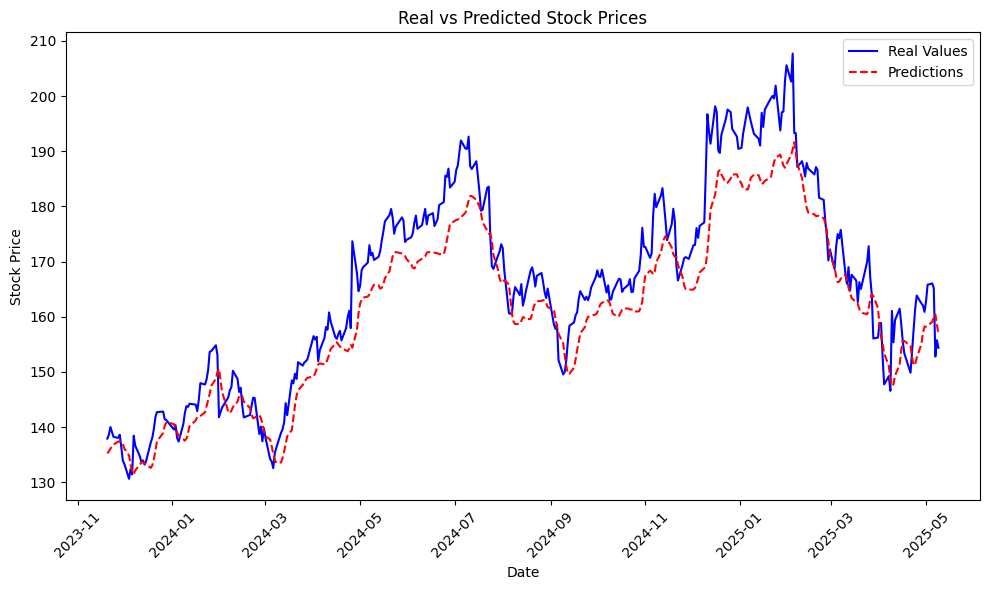

In [10]:
from utils.log_and_plot import log_and_plot_predictions
# Denormalize
true_values_denorm = real_values * (price_max - price_min) + price_min
predictions_denorm = predicted_values * (price_max - price_min) + price_min

log_and_plot_predictions(
    true_values=true_values_denorm,
    predictions=predictions_denorm,
    test_dates=test_dates,
    true_values_rolling=None,
    predictions_rolling=None,
    model_name='LSTM',
    attack_name='NA',
    epsilon=0.00,
    res_tab=res_tab,
    similarity_fn=scalar_similarity,
    google=True
)

In [11]:
display(res_tab)

Attack              NA  REV               
ε                 0.00 0.00 0.01 0.10 0.20
Model Metric                              
LSTM  MAE     5.597373  NaN  NaN  NaN  NaN
      RMSE    6.783609  NaN  NaN  NaN  NaN
      SIM     0.999616  NaN  NaN  NaN  NaN

## STEP 3: REVERSE DATA

In [12]:
from utils.setup_google_stock_dataset import prepare_stock_dataset
google_data_reversed = google_data
result_rev = prepare_stock_dataset(google_data_reversed,reverse=True)
train_loader_rev = result_rev['train_loader']
test_loader_rev = result_rev['test_loader']
train_size_rev = result['train_size']
min_max_rev = result['min_max']
dates_rev = result_rev['dates']
price_min_rev, price_max_rev = min_max['Close/Last']


## STEP 4: TRAIN REVERSE LSTM

In [13]:
model_google_rev = SimpleLSTM(input_size=5, hidden_size=64, output_size=1, num_layers=2)
optimizer_rev = torch.optim.Adam(model_google_rev.parameters(), lr=0.001)

train_model(model_google_rev, loss_fn, optimizer_rev, num_epochs, train_loader_rev)

Epoch [1/30], Train Loss: 0.0497
Epoch [2/30], Train Loss: 0.0122
Epoch [3/30], Train Loss: 0.0029
Epoch [4/30], Train Loss: 0.0016
Epoch [5/30], Train Loss: 0.0013
Epoch [6/30], Train Loss: 0.0012
Epoch [7/30], Train Loss: 0.0010
Epoch [8/30], Train Loss: 0.0009
Epoch [9/30], Train Loss: 0.0010
Epoch [10/30], Train Loss: 0.0010
Epoch [11/30], Train Loss: 0.0010
Epoch [12/30], Train Loss: 0.0009
Epoch [13/30], Train Loss: 0.0009
Epoch [14/30], Train Loss: 0.0009
Epoch [15/30], Train Loss: 0.0009
Epoch [16/30], Train Loss: 0.0009
Epoch [17/30], Train Loss: 0.0009
Epoch [18/30], Train Loss: 0.0008
Epoch [19/30], Train Loss: 0.0009
Epoch [20/30], Train Loss: 0.0009
Epoch [21/30], Train Loss: 0.0008
Epoch [22/30], Train Loss: 0.0008
Epoch [23/30], Train Loss: 0.0008
Epoch [24/30], Train Loss: 0.0008
Epoch [25/30], Train Loss: 0.0008
Epoch [26/30], Train Loss: 0.0008
Epoch [27/30], Train Loss: 0.0007
Epoch [28/30], Train Loss: 0.0008
Epoch [29/30], Train Loss: 0.0008
Epoch [30/30], Train Lo

LSTM | REV – Epsilon 0.00 – MAE: 5.4172 | SIM: 0.9996


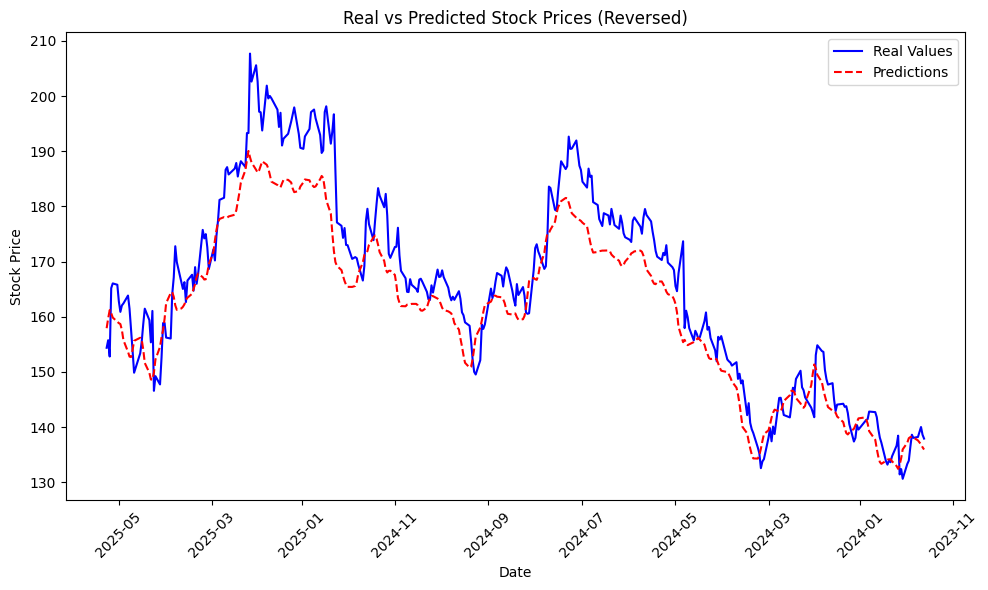

In [14]:
results_rev = evaluate_model_google(model_google_rev, test_loader_rev, dates_rev, train_size_rev)

real_values_rev = results_rev['real_values']
predicted_values_rev = results_rev['predicted_values']
test_dates_rev = results_rev['test_dates']
true_values_denorm_rev = real_values_rev * (price_max_rev - price_min_rev) + price_min_rev
predictions_denorm_rev = predicted_values_rev * (price_max_rev - price_min_rev) + price_min_rev

log_and_plot_predictions(
    true_values=true_values_denorm_rev,
    predictions=predictions_denorm_rev,
    test_dates=test_dates_rev,
    true_values_rolling=None,
    predictions_rolling=None,
    model_name='LSTM',
    attack_name='REV',
    epsilon=0.00,
    res_tab=res_tab,
    similarity_fn=scalar_similarity,
    google=True,
    reverse=True
)

# STEP 5: ATTACK FGSM

In [15]:
from attack.fgsm import fgsm_attack

In [22]:
epsilon = 0
model_google_rev.eval()
model_google.eval()

all_true = []
all_pred = []

loss_fn = nn.MSELoss()

for x, y in test_loader:
    x = x.clone().detach().requires_grad_(True)
    y = y.clone().detach()

    # Step 5.1: Reverse x
    x_reversed = x.flip(dims=[1]).detach().clone().requires_grad_(True)

    # Step 5.2: Predict with the reversed model
    output_rev = model_google_rev(x_reversed)

    # Step 5.3: Compute the loss and perform backward
    loss = loss_fn(output_rev, y)
    model_google_rev.zero_grad()
    loss.backward()

    # Step 5.4: Apply FGSM
    x_adv_reversed = x_reversed + epsilon * x_reversed.grad.sign()
    x_adv_reversed = torch.clamp(x_adv_reversed, 0, 1)

    # Step 5.5: Reverse again to get back to normal order
    x_adv = x_adv_reversed.flip(dims=[1])

    # Step 6: Predict with the normal model on the advertial data
    with torch.no_grad():
        pred = model_google(x_adv)

    # Denormalize
    pred_denorm = pred.cpu().numpy() * (price_max - price_min) + price_min
    y_denorm = y.cpu().numpy() * (price_max - price_min) + price_min

    all_true.extend(y_denorm.flatten())
    all_pred.extend(pred_denorm.flatten())


test | test – Epsilon 0.00 – MAE: 5.5974 | SIM: 0.9996


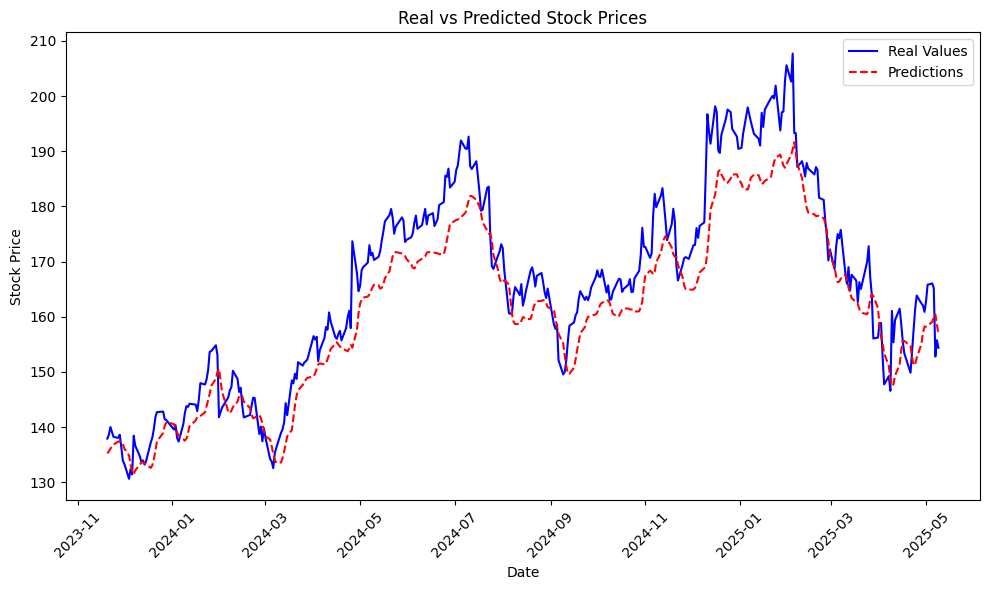

In [23]:
log_and_plot_predictions(
    true_values=all_true,
    predictions=all_pred,
    test_dates=test_dates,
    true_values_rolling=None,
    predictions_rolling=None,
    model_name='test',
    attack_name='test',
    epsilon=0.00,
    res_tab=res_tab,
    similarity_fn=scalar_similarity,
    google=True
)

In [21]:
display(res_tab)

Attack              NA       REV                     test
ε                 0.00      0.00 0.01 0.10 0.20      0.00
Model Metric                                             
LSTM  MAE     5.597373  5.417233  NaN  NaN  NaN       NaN
      RMSE    6.783609  6.701341  NaN  NaN  NaN       NaN
      SIM     0.999616  0.999562  NaN  NaN  NaN       NaN
test  MAE          NaN       NaN  NaN  NaN  NaN  5.597372
      SIM          NaN       NaN  NaN  NaN  NaN  0.999616
      RMSE         NaN       NaN  NaN  NaN  NaN  6.783609